# Sample generator

In [12]:
import os
import io
import sys
import zipfile

import IPython.display as ipd

from numpy import *
from matplotlib.pyplot import *
from matplotlib import rcParams
from scipy.io import wavfile
from collections import namedtuple

rcParams['figure.figsize'] = 10, 4
sys.path.append("..")

from samplegen import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Convert to Bitwig Multisample

In [2]:
volca_c3 = sample_t(
    filename = "/home/soren/vcs/sbnsampler/app/sound/volca_c3.wav",
    note_root = 60,
    note_max = 127,
    note_min = 0,
    loop_start = 26592,
    loop_stop = 70614,
)

bitwig.write_single("volca_c3.multisample", volca_c3)

In [3]:
volca_c4 = sample_t(
    filename = "/home/soren/vcs/sbnsampler/app/sound/volca_c4.wav",
    note_root = 72,
    note_max = 127,
    note_min = 0,
    loop_start = 26538,
    loop_stop = 70618,
)

bitwig.write_single("volca_c4.multisample", volca_c4)

## Find loop points

In [49]:
def zcd(x, rising=True):
    # Find all indexes just before a zero-crossing
    if rising:
        return where(0 < diff(sign(x)))[0]
    else:
        return where(0 > diff(sign(x)))[0]

def moving_average(x, w):
    return convolve(x, ones(w), "same") / w

def find_loop_points_simple(x, fs, start_range, stop_range, averages=1, rising=True, visualize=0):
    # Apply some averaging before finding zero crossings
    x = moving_average(x, averages)
    
    # Ranges to search for loop points in
    N = len(x)
    start_range = [int(X*N) for X in start_range]
    stop_range = [int(X*N) for X in stop_range]
    
    # Find zero-crossings
    zc = zcd(x, rising=rising)
    
    # Approximate frequency
    #f = fs/max(diff(zc))
    #print(f)
    
    # Find the closest-to-zero zero-crossing within start and stop range
    zc_start = min([X for X in zc if ((start_range[0]<=X) & (X<=start_range[1]))])
    zc_stop = min([X for X in zc if ((stop_range[0]<=X) & (X<=stop_range[1]))])

    return zc_start, zc_stop

def player(x, fs):
    ipd.display(ipd.Audio(data=x, rate=fs))
    
def player_looped(x, fs, loop_start, loop_stop):
    y = hstack([
        x[0:loop_stop],
        x[loop_start:loop_stop],
        x[loop_start:loop_stop],
        x[loop_start:],
    ])
    ipd.display(ipd.Audio(data=y, rate=fs))
    t = arange(len(x))/len(x)
    plot(t, x)
    axvline(loop_start/len(x), color="k")
    axvline(loop_stop/len(x), color="k")

def bitwig_loop_and_save(input_file, output_file, start_range, stop_range, note_root, rising=True):
    fs, x = wavfile.read(input_file)
    l0, l1 = find_loop_points_simple(x, fs, start_range, stop_range, averages=1, rising=rising)
    player_looped(x, fs, l0, l1)

    bitwig.write_single(
        output_file,
        sample_t(
            filename = input_file,
            note_root = note_root,
            note_max = 127,
            note_min = 0,
            loop_start = l0,
            loop_stop = l1,
        ),
    )

In [16]:
bitwig_loop_and_save(
    input_file = "/home/soren/Dropbox/instruments/samples/vintage_synth_samples/roland_jupiter-8_vol1/Vintage Synth Samples - ROLAND JUPITER-8 VOL. 1 - 03 ROLAND JUPITER-8.wav",
    output_file = "vss_jupyter_03.multisample",
    start_range = [0.2, 0.3],
    stop_range = [0.8, 0.9],
    note_root = 48,   
)

In [17]:
bitwig_loop_and_save(
    input_file = "/home/soren/Dropbox/instruments/samples/vintage_synth_samples/roland_jupiter-8_vol1/Vintage Synth Samples - ROLAND JUPITER-8 VOL. 1 - 08 ROLAND JUPITER-8.wav",
    output_file = "vss_jupyter_08.multisample",
    start_range = [0.165, 0.17],
    stop_range = [0.6, 0.61],
    note_root = 60,   
)

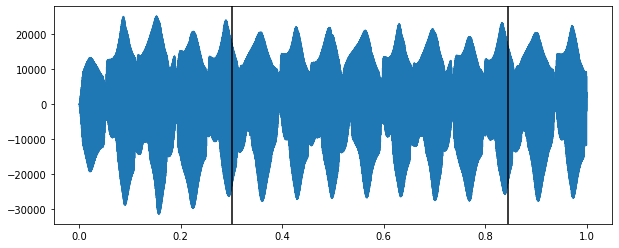

In [71]:
bitwig_loop_and_save(
    input_file = "/home/soren/Dropbox/instruments/samples/vintage_synth_samples/roland_jupiter-8_vol1/modified/vss_jupiter8_10.wav",
    output_file = "vss_jupyter_10.multisample",
    start_range = [0.3, 0.4],
    stop_range = [0.845, 0.9],
    note_root = 60,   
)

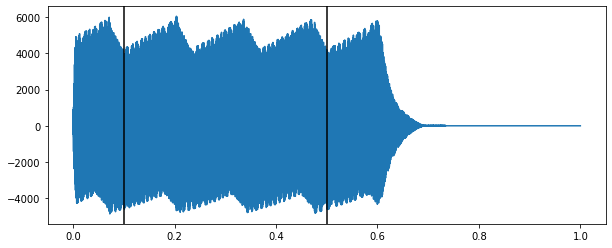

In [23]:
bitwig_loop_and_save(
    input_file = "/home/soren/Dropbox/instruments/samples/vintage_synth_samples/roland_jupiter-8_vol1/Vintage Synth Samples - ROLAND JUPITER-8 VOL. 1 - 17 ROLAND JUPITER-8.wav",
    output_file = "vss_jupyter_17.multisample",
    start_range = [0.1, 0.3],
    stop_range = [0.5, 0.58],
    note_root = 60,   
)

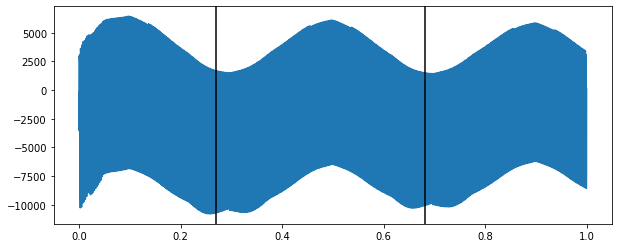

In [33]:
bitwig_loop_and_save(
    input_file = "/home/soren/Dropbox/instruments/samples/vintage_synth_samples/roland_jupiter-8_vol1/Vintage Synth Samples - ROLAND JUPITER-8 VOL. 1 - 21 ROLAND JUPITER-8.wav",
    output_file = "vss_jupyter_21.multisample",
    start_range = [0.27, 0.30],
    stop_range = [0.68, 0.74],
    note_root = 36,   
)